In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sb
%matplotlib inline

In [3]:
data = pd.read_csv('train_v9rqX0R.csv')

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


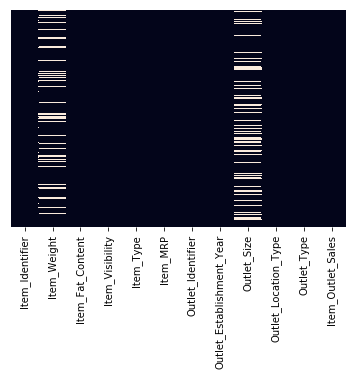

In [6]:
sb.heatmap(data.isnull(), cbar= False, yticklabels= False)

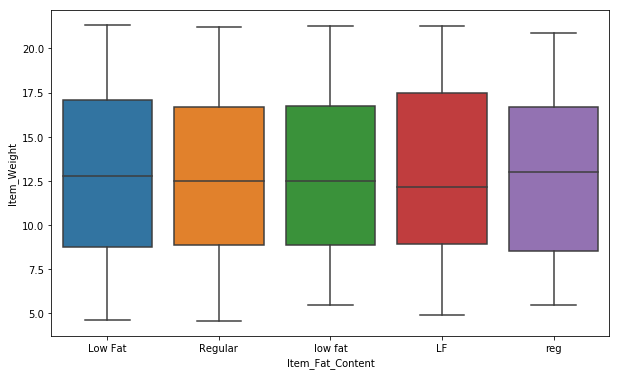

In [7]:
plt.figure(figsize=(10,6))
sb.boxplot(data['Item_Fat_Content'], data['Item_Weight'])

In [8]:
def func(x):
    weight = x[0]
    fat = x[1]
    if pd.isnull(weight):
        if fat == 'Low Fat':
            return 13
        elif fat == 'Regular':
            return 12.9
        elif fat == 'low fat':
            return 12.5
        elif fat == 'LF':
            return 12
        else:
            return 13
    else:
        return weight

In [9]:
data['Item_Weight'] = data[['Item_Weight','Item_Fat_Content']].apply(func, axis = 1)

In [10]:
data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

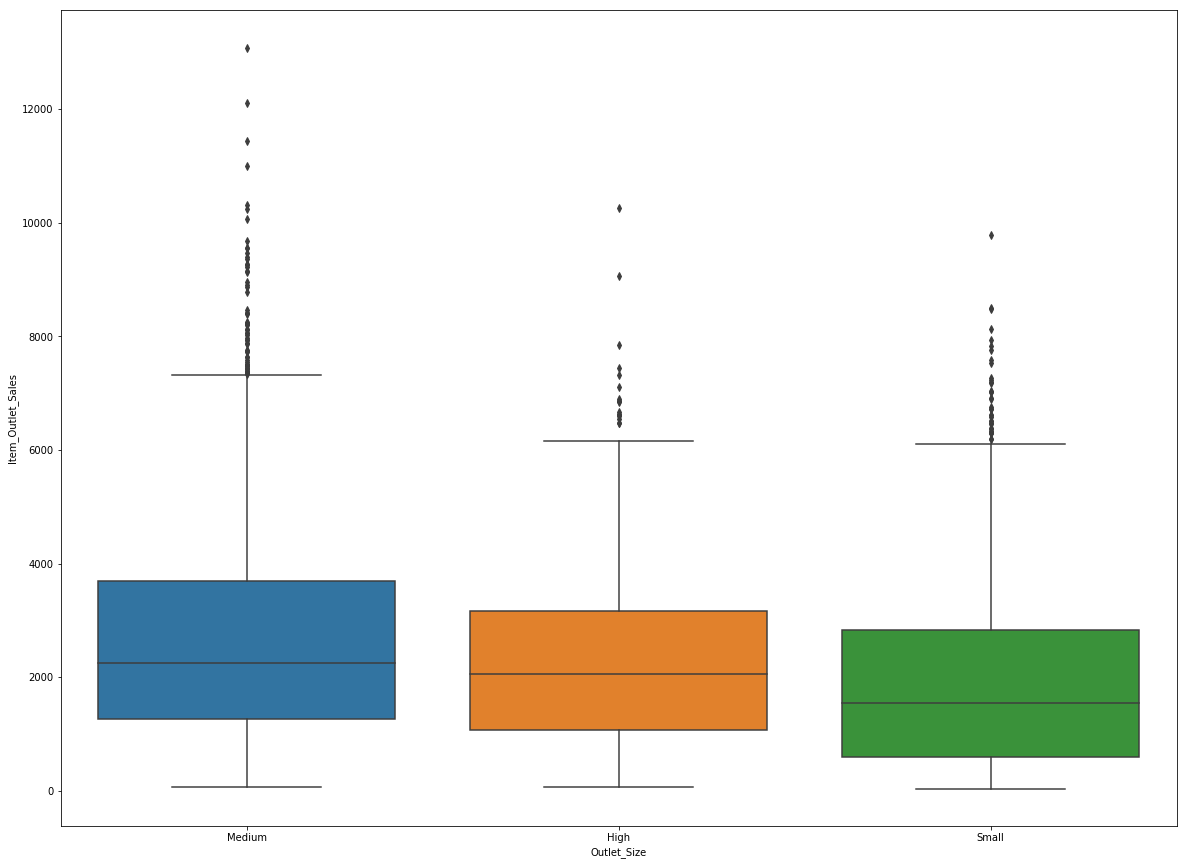

In [11]:
plt.figure(figsize= (20,15))
sb.boxplot(data['Outlet_Size'], data['Item_Outlet_Sales'])

In [12]:
data[data['Outlet_Size']== 'Medium']['Item_Outlet_Sales'].describe()

count     2793.000000
mean      2681.603542
std       1855.210528
min         69.243200
25%       1270.346400
50%       2251.069800
75%       3691.195200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [13]:
def randi(y):
    sales = y[0]
    size = y[1]
    if pd.isnull(size):
        if sales == range(70, 10258):
            return 'Medium'
        elif sales == range(73, 13087):
            return 'High'
        elif sales == range(34, 9800):
            return 'Small'
    else:
        return size

In [14]:
data['Outlet_Size'].fillna(value = 0, inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [16]:
data['Item_Fat_Content'] = pd.get_dummies(data['Item_Fat_Content'], drop_first=True)

In [17]:
data['Item_Type'] = pd.get_dummies(data['Item_Type'], drop_first= True)

In [18]:
data['Outlet_Identifier'] = pd.get_dummies(data['Outlet_Identifier'], drop_first= True)

In [19]:
data['Outlet_Size'] = pd.get_dummies(data['Outlet_Size'], drop_first= True)

In [20]:
data['Outlet_Location_Type'] = pd.get_dummies(data['Outlet_Location_Type'], drop_first= True)

In [21]:
data['Outlet_Type'] = pd.get_dummies(data['Outlet_Type'], drop_first= True)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null uint8
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null uint8
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null uint8
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null uint8
Outlet_Location_Type         8523 non-null uint8
Outlet_Type                  8523 non-null uint8
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(1), uint8(6)
memory usage: 416.2+ KB


In [23]:
final_data = pd.get_dummies(data, drop_first= True)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
stc = StandardScaler()

In [26]:
scaled = stc.fit_transform(data.drop(['Item_Identifier','Item_Outlet_Sales'], axis = 1))

C:\Users\EazyworldPC\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\EazyworldPC\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = scaled
y = data['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin = LinearRegression()

In [31]:
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
pred = lin.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
print(np.sqrt(mean_squared_error(y_test,pred)))

1332.1380692782354


In [35]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
error = []

In [41]:
for i in range (1,100):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test,k_pred)))
    

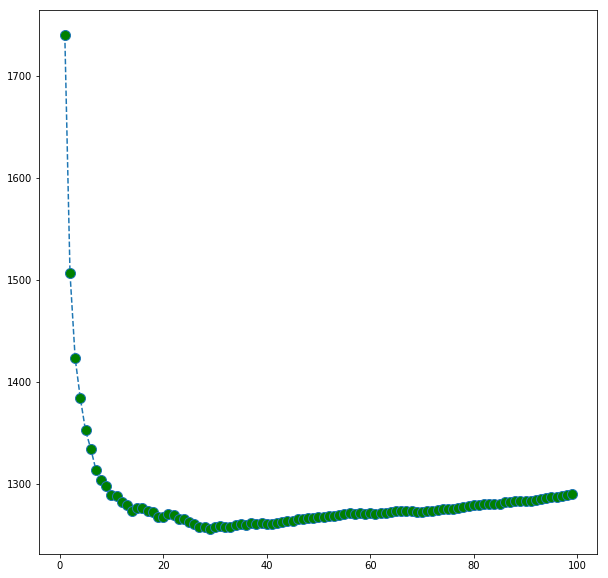

In [42]:
plt.figure(figsize= (10,10))
plt.plot(range(1,100), error, markersize = 10, marker = 'o', markerfacecolor = 'g', ls = '--')

In [45]:
pd.Series(error).min()

1255.5550208039042

In [46]:
from sklearn.tree import DecisionTreeRegressor

In [47]:
dtr = DecisionTreeRegressor()

In [48]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [49]:
d_pred = dtr.predict(X_test)

In [50]:
np.sqrt(mean_squared_error(y_test,d_pred))

1778.8915907953035

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
rfr = RandomForestRegressor()

In [52]:
error = []

In [55]:
for i in [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500]:
    rfr = RandomForestRegressor(n_estimators= i)
    rfr.fit(X_train, y_train)
    r_pred = rfr.predict(X_test)
    error.append(np.sqrt(mean_squared_error(y_test,r_pred)))

In [ ]:
pd.Series(error).min()